<a href="https://colab.research.google.com/github/columose/WOAH-FMD-dataset/blob/main/3_Visualise_baselined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Save figures function
def save_fig2colab(file):
  path = r'/content/drive/MyDrive/Colab Notebooks/WOAH/Script outputs/'
  plt.savefig(path + file ,bbox_inches="tight")

In [3]:
df_grouped = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/grouped_data.csv')
df_grouped.head()

,World region,Year,New outbreaks,Susceptible,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
0,Africa,2005,616,600684,23757,44,146,874,94247
1,Africa,2006,563,646549,62550,1186,7169,1941,817491
2,Africa,2007,399,681985,34835,133,514,900,1053980
3,Africa,2008,542,14565186,52115,1620,256,636,725737
4,Africa,2009,529,7548535,34594,82,358,556,903037


In [4]:
# Transform data frame to numpy array for baselining

test_vars = ['New outbreaks','Susceptible','Cases','Killed and disposed of','Slaughtered',
             'Deaths','Vaccinated']
regions = df_grouped['World region'].unique()

# Set dictionary key of world region as an index
df_grouped.set_index("World region", inplace = True)

# Select all data apart from year
selected_data = df_grouped.loc[:, df_grouped.columns != 'Year']

# Convert all data to numpy arrays

all_data=[]
for ireg, region in enumerate(regions):
    all_data.append(selected_data.loc[region].to_numpy())

In [5]:
# Baseline the data for each variable
# Baselined_data = [variable(data point)/variable(mean)] * 100

converted_data = []
for ireg in range(len(all_data)):
  baselined = []

  for ivar in range(len(test_vars)):
      base = []
      data = []

      # Baseline for a country's variable is the mean data point from all years
      base = all_data[ireg][:,ivar].mean()

      # Convert each data point to a percentage relative to the base
      data = (all_data[ireg][:,ivar]/base)*100
      baselined.append(np.rint(data))

  converted_data.append(baselined) # Converted data is a list with regions x converted data matrix [year x variable]



In [6]:
# Convert our percent-converted data back to a dataframe
df_converted = pd.DataFrame(converted_data, columns = test_vars)
df_converted.index = list(regions)
df_converted

,New outbreaks,Susceptible,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
Africa,"[62.0, 57.0, 40.0, 55.0, 53.0, 99.0, 122.0, 13...","[17.0, 18.0, 19.0, 406.0, 210.0, 83.0, 129.0, ...","[38.0, 99.0, 55.0, 83.0, 55.0, 146.0, 239.0, 1...","[4.0, 112.0, 13.0, 153.0, 8.0, 7.0, 1207.0, 8....","[1.0, 71.0, 5.0, 3.0, 4.0, 12.0, 8.0, 6.0, 12....","[35.0, 77.0, 36.0, 25.0, 22.0, 112.0, 416.0, 1...","[11.0, 92.0, 119.0, 82.0, 102.0, 78.0, 279.0, ..."
Americas,"[185.0, 98.0, 134.0, 134.0, 372.0, 106.0, 17.0...","[353.0, 252.0, 163.0, 122.0, 91.0, 56.0, 37.0,...","[307.0, 132.0, 178.0, 117.0, 145.0, 94.0, 22.0...","[776.0, 141.0, 0.0, 36.0, 1.0, 0.0, 28.0, 0.0,...","[599.0, 0.0, 501.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[61.0, 13.0, 27.0, 47.0, 189.0, 378.0, 0.0, 0....","[536.0, 125.0, 157.0, 116.0, 22.0, 62.0, 26.0,..."
Asia,"[43.0, 45.0, 32.0, 14.0, 51.0, 95.0, 53.0, 30....","[402.0, 22.0, 26.0, 17.0, 184.0, 71.0, 37.0, 2...","[112.0, 129.0, 96.0, 33.0, 95.0, 251.0, 86.0, ...","[11.0, 9.0, 24.0, 1.0, 15.0, 758.0, 530.0, 26....","[70.0, 238.0, 86.0, 10.0, 18.0, 143.0, 336.0, ...","[66.0, 105.0, 162.0, 25.0, 48.0, 478.0, 91.0, ...","[5.0, 23.0, 48.0, 32.0, 23.0, 75.0, 176.0, 71...."
Europe,"[195.0, 11.0, 113.0, 28.0, 309.0, 21.0, 245.0,...","[17.0, 0.0, 13.0, 32.0, 53.0, 5.0, 341.0, 343....","[19.0, 11.0, 4.0, 5.0, 9.0, 2.0, 43.0, 231.0, ...","[30.0, 0.0, 22.0, 0.0, 19.0, 0.0, 69.0, 224.0,...","[0.0, 0.0, 0.0, 1498.0, 0.0, 0.0, 0.0, 2.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1150.0, 0...","[972.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 49.0, 0...."


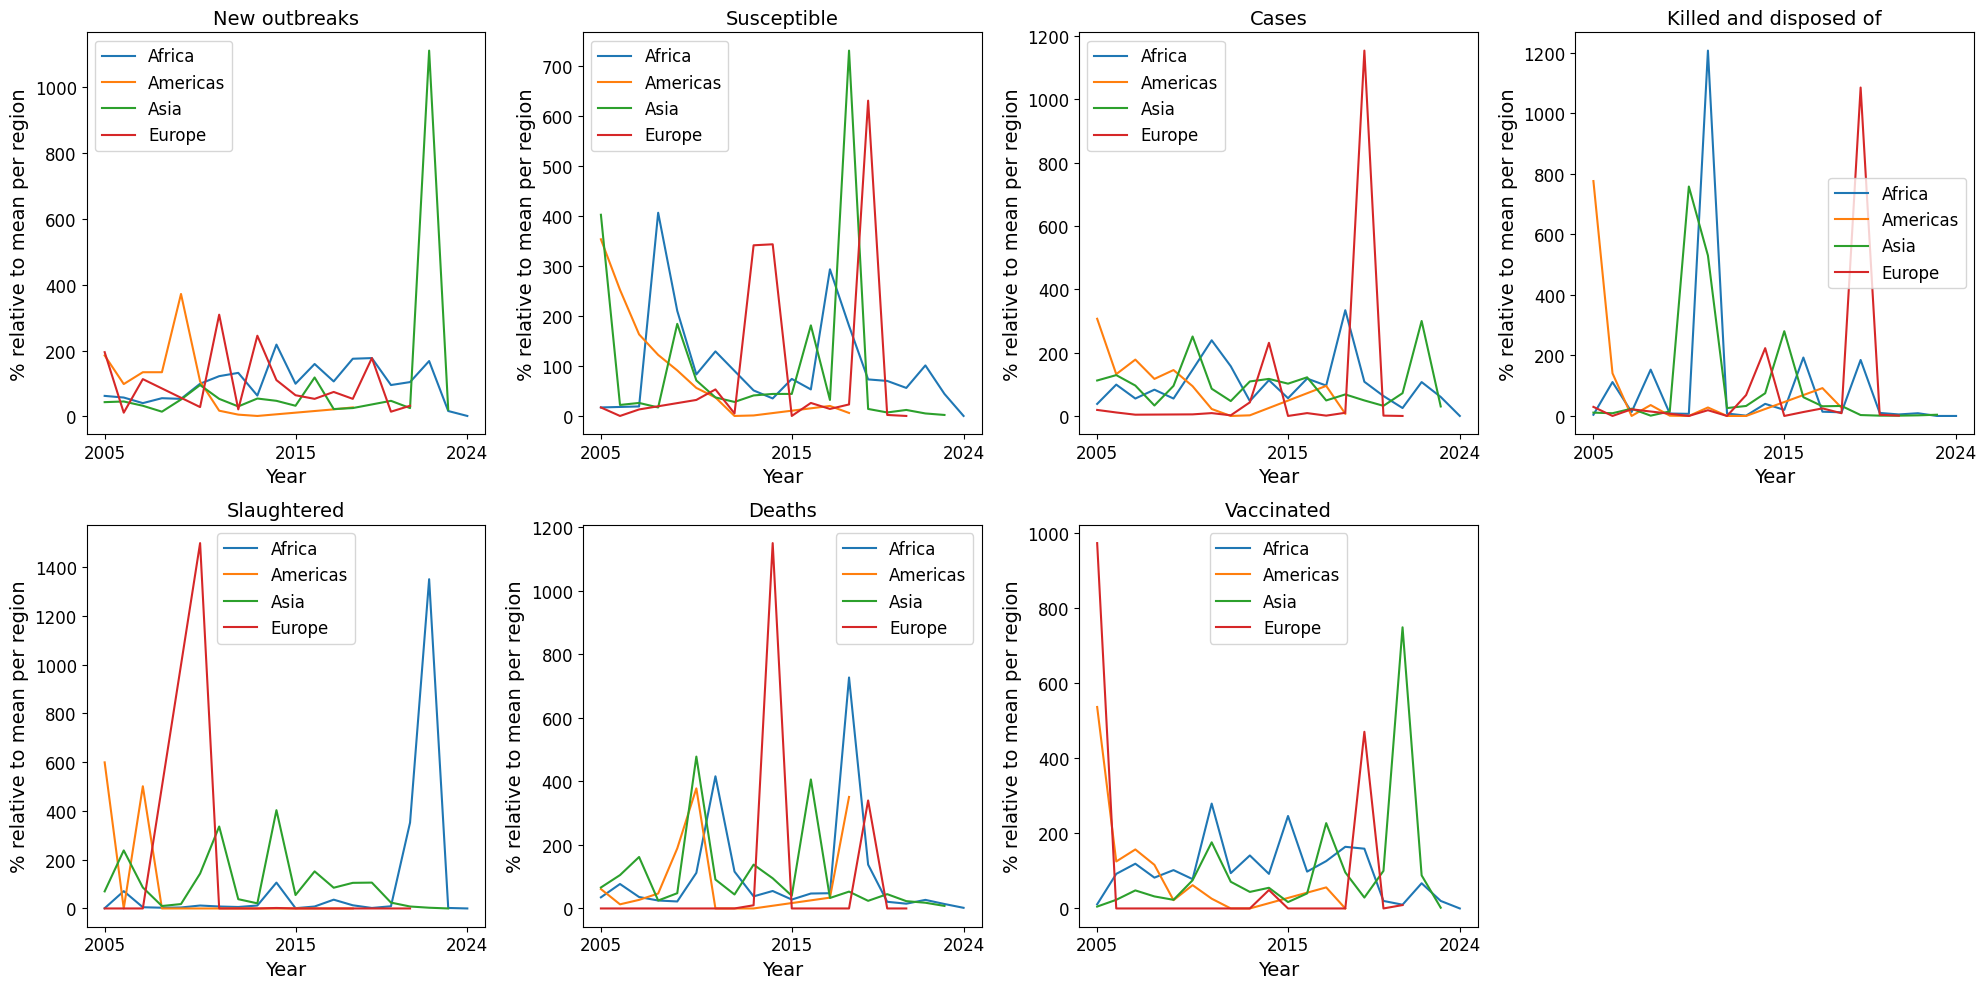

In [12]:
# Set up subplots for percent differences
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

# Keep most of the same code as before
years = df_grouped.Year
years_unique = years.unique()
year_mid = years_unique[int(len(years_unique)/2)]
year_ticks = [years_unique[0], year_mid, years_unique[-1]]

# Plot the time series for each world region
for ivar, var in enumerate(test_vars):
    n = 0
    for ireg, reg in enumerate(regions):
        axs[ivar].plot(years[reg], converted_data[n][ivar], label=reg)
        axs[ivar].set_xticks(year_ticks)
        n+=1

# Set labels and titles
for ivar, ax in enumerate(axs[:7]): # Because we only have 7 axes
      ax.set_ylabel('% relative to mean per region', fontsize = 14)
      ax.set_xlabel('Year', fontsize = 14)
      ax.set_title(test_vars[ivar], fontsize = 14)
      ax.set_xticklabels(ax.get_xticks())
      ax.tick_params(axis='both', which='major', labelsize=12)
      ax.legend(fontsize = 12)

fig.delaxes(axs[7]) # Delete axis in position 2,4 that contained no data
plt.tight_layout()

#save_fig2colab('Baselined time-series')
plt.show()

**Observations**

Baselining the data provides an entirely new outlook for foot and mouth disease outcomes. Spikes in cases, slaughtered and deaths are more evident in Europe.